In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic data for each feature
data = {
    "Temperature": np.random.choice(["Hot", "Mild", "Cool"], num_samples),
    "Humidity": np.random.choice(["High", "Normal"], num_samples),
    "Outlook": np.random.choice(["Sunny", "Overcast", "Rainy"], num_samples),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Generate PlayTennis target variable based on some arbitrary rules with noise
df["PlayTennis"] = ((df["Outlook"] == "Sunny") & (df["Humidity"] == "Normal")).astype(int)
df["PlayTennis"] = np.where(np.random.rand(num_samples) > 0.7, 1 - df["PlayTennis"], df["PlayTennis"])  # Add noise

# Display first few rows
print(df.head())


  Temperature Humidity   Outlook  PlayTennis
0        Cool     High     Sunny           0
1         Hot     High     Rainy           0
2        Cool     High  Overcast           1
3        Cool     High     Sunny           1
4         Hot   Normal     Rainy           1


In [12]:
# Encode categorical variables to numeric
df["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rainy": 2})


In [13]:
# Define features and target
X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Initialize and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80       194
           1       0.67      0.31      0.43       106

    accuracy                           0.70       300
   macro avg       0.69      0.61      0.61       300
weighted avg       0.70      0.70      0.67       300



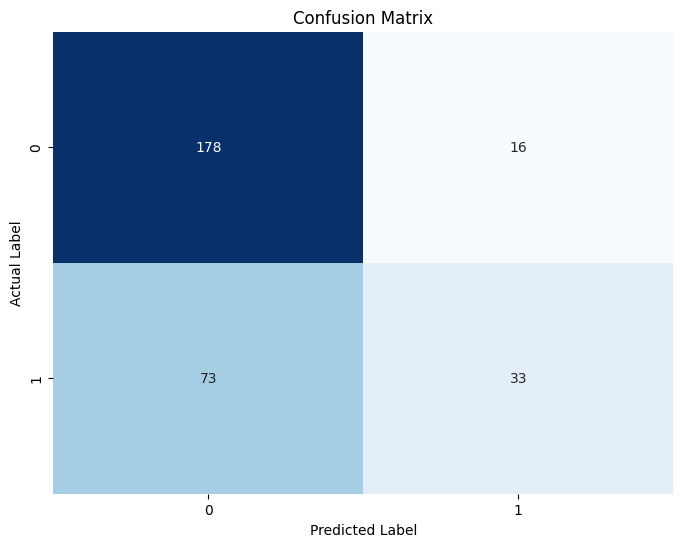

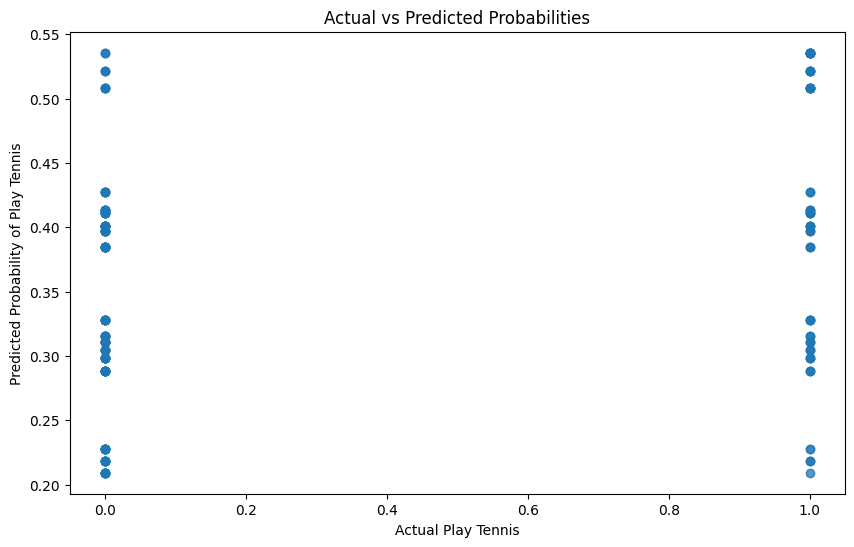

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Predicted probabilities for visualization
y_probs = model.predict_proba(X_test)[:, 1]

# Scatter plot for actual vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_probs, alpha=0.5)
plt.xlabel("Actual Play Tennis")
plt.ylabel("Predicted Probability of Play Tennis")
plt.title("Actual vs Predicted Probabilities")
plt.show()


In [17]:
# Define a new sample with the same features
new_data = pd.DataFrame({
    "Temperature": [0],  # Hot
    "Humidity": [1],     # Normal
    "Outlook": [0]       # Sunny
})

# Predict play probability and label
new_pred_prob = model.predict_proba(new_data)[:, 1]
new_pred_label = model.predict(new_data)

print(f"Predicted Probability of Play Tennis: {new_pred_prob[0]:.2f}")
print(f"Predicted Play Tennis Label: {new_pred_label[0]}")


Predicted Probability of Play Tennis: 0.51
Predicted Play Tennis Label: 1
